# X-RAY PNEUMONIA DETECTION : DEEP LEARNING MODEL

### Importing important libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers , models, datasets 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os 
import shutil 
import matplotlib.pyplot as plt 

### SETTING UP THE DATA

In [2]:
link = 'https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497'
zip_file = tf.keras.utils.get_file(origin = link,
                       extract =True,
                       fname='ChestXRay2017.zip')

##### DATASET INFORMATION:

This dataset is taken from kaggle : https://www.kaggle.com/tolgadincer/labeled-chest-xray-images

According to the paper, the images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou.

In [3]:
current = 'C:\\Users\\AK TECHNOLOGY\\.keras\\datasets'
base = os.path.join(current, 'chest_xray')


In [4]:
zip_base = os.path.dirname(zip_file)

In [5]:
os.listdir(base)

['.DS_Store', 'test', 'train']

In [6]:
train_dir = os.path.join(base, 'train')
test_dir = os.path.join (base, 'test')

train_pnem= os.path.join (train_dir, 'PNEUMONIA')
train_norm= os.path.join (train_dir, 'NORMAL')
test_pnem= os.path.join (test_dir, 'PNEUMONIA')
test_norm= os.path.join (test_dir, 'NORMAL')
print('Training examples:', ( len(os.listdir(train_pnem))+len(os.listdir(train_norm))))
print('Test examples:', (len(os.listdir(test_pnem))+len(os.listdir(test_norm))))

Training examples: 5233
Test examples: 624


### DATA AUGMENTATION:

In [7]:
#Applying Image data augmentation On Training set 
#Generating images
BATCH=100
img_shape=150
train_image= ImageDataGenerator(rescale = 1./255,
                                zoom_range= 0.4,
                                rotation_range =20,
                                shear_range=0.1,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                #fill_mode='constant'
                               )
train_data = train_image.flow_from_directory(batch_size=BATCH,
                                            directory = train_dir,
                                            shuffle=True,
                                            class_mode='categorical',
                                            target_size=(img_shape,img_shape))

                                

Found 5232 images belonging to 2 classes.


In [8]:
# Using Test directory as our validation set to check its curve
val_image= ImageDataGenerator(rescale = 1./255)
val_data = val_image.flow_from_directory(batch_size=BATCH,
                                            directory = test_dir,
                                            shuffle=False,                    #Since it is validation set we set it to false
                                            class_mode='categorical',
                                            target_size=(img_shape,img_shape))

                                

Found 624 images belonging to 2 classes.


### PLOTTING SOME AUGMENTED IMAGES OF X-RAYS

In [9]:
#ploting the images :
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

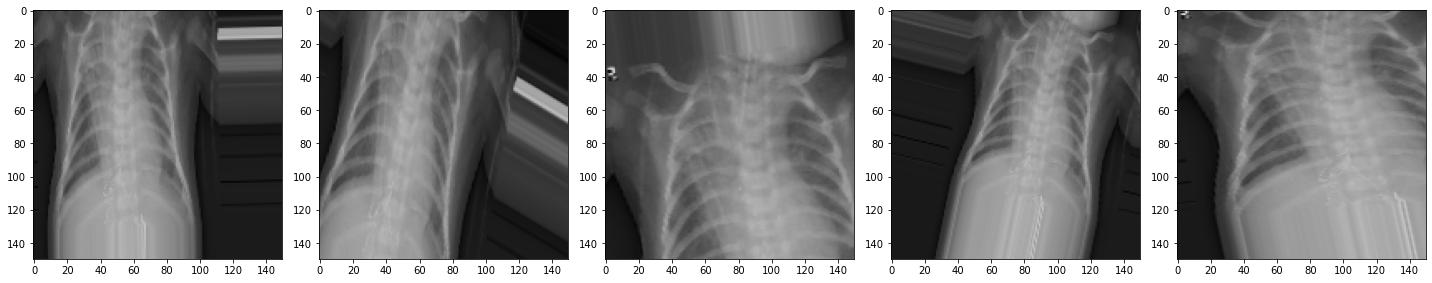

In [10]:
augmented_images = [train_data[0][0][0] for i in range(5)]
plotImages(augmented_images)

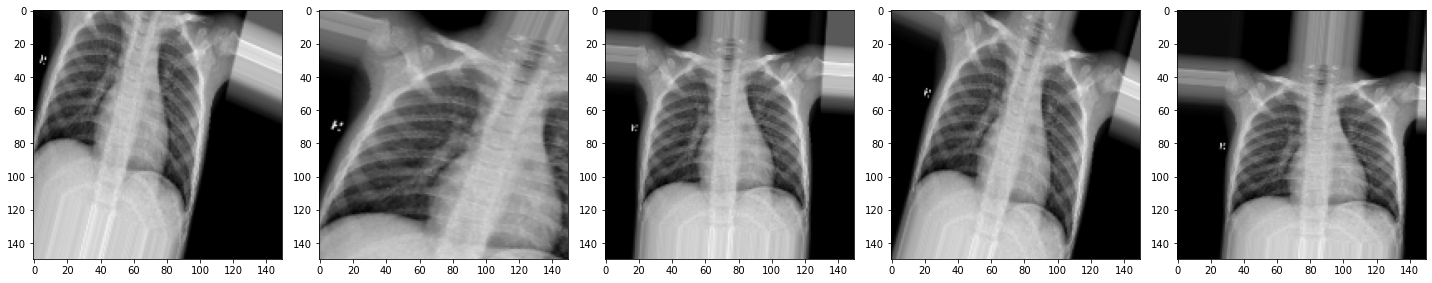

In [11]:
#some other plotting 
augmented_images = [train_data[0][0][1] for i in range(5)]
plotImages(augmented_images)

### SETTING UP THE MODEL

I set the model as a Convolutional nueral network with the following congfiguration:

    - 3 Convolutional layers with Kernel size (3,3)
    - 3 MaxPooling layers with pool_size= (2,2)
    - A Flatten Layer
    - Dropout layer for minimizing the overfitting in the model
    - Softmax activation (Output Layer)

In [15]:
# Creating the model:
cnn= models.Sequential([layers.Conv2D(32, kernel_size=(3), activation='relu'),
                      layers.MaxPooling2D((2,2)),
                      layers.Conv2D(64, kernel_size=(3), activation='relu'),
                      layers.MaxPooling2D((2,2)),
                      layers.Conv2D(128, kernel_size=(3), activation='relu'),
                      layers.MaxPooling2D((2,2)),
                      layers.Flatten(),
                      layers.Dropout(0.5),
                      layers.Dense(512, activation='relu'),
                      layers.Dense(2, activation = 'sigmoid')
                       ])


In [16]:
#compiling the model:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

### TRAINING THE MODEL:

In [18]:
#training the model: 
history = cnn.fit_generator(train_data, epochs=20 , validation_data=val_data, verbose =1)

Epoch 1/20
53/53 [==============================] - 164s 3s/step - loss: 0.5783 - acc: 0.7399 - val_loss: 0.8280 - val_acc: 0.6250
Epoch 2/20
53/53 [==============================] - 153s 3s/step - loss: 0.4787 - acc: 0.7594 - val_loss: 0.7257 - val_acc: 0.6587
Epoch 3/20
53/53 [==============================] - 94s 2s/step - loss: 0.4157 - acc: 0.8058 - val_loss: 0.6503 - val_acc: 0.7083
Epoch 4/20
53/53 [==============================] - 103s 2s/step - loss: 0.3676 - acc: 0.8333 - val_loss: 0.5216 - val_acc: 0.7885
Epoch 5/20
53/53 [==============================] - 104s 2s/step - loss: 0.3180 - acc: 0.8549 - val_loss: 0.4989 - val_acc: 0.7708
Epoch 6/20
53/53 [==============================] - 94s 2s/step - loss: 0.3280 - acc: 0.8551 - val_loss: 0.4057 - val_acc: 0.8317
Epoch 7/20
53/53 [==============================] - 89s 2s/step - loss: 0.2947 - acc: 0.8721 - val_loss: 0.3111 - val_acc: 0.8910
Epoch 8/20
53/53 [==============================] - 89s 2s/step - loss: 0.2665 - acc: 

### Following is the sumary of the model with all layers

In [19]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, None, None, 128)   0         
_________________________________________________________________
flatten_1 (Flatten)          (None, None)             

### Model Analysis of its accuracy and loss function:

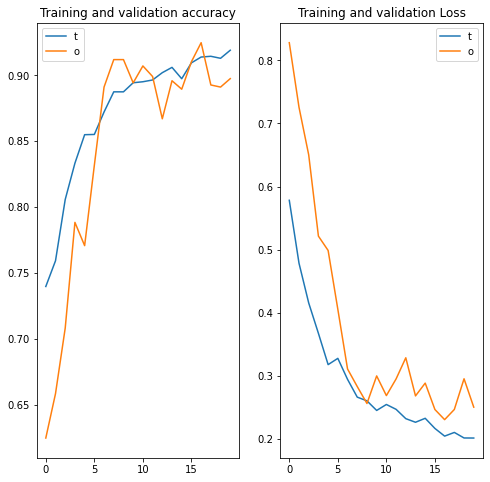

In [24]:
#plotting the training accuracy and validation accuracy with respect to epochs:
EPOCHS=20
plt.figure(figsize=(8,8))
epoch_range = range(EPOCHS)
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']
plt.subplot(1,2,1)
plt.plot(epoch_range,acc, label='Training accuracy' )
plt.plot(epoch_range, val_acc, label ='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend('top_left')
#plt.show()

plt.subplot(1,2,2)
plt.plot(epoch_range,loss, label='Training loss' )
plt.plot(epoch_range, val_loss, label ='Validation_loss')
plt.title('Training and validation Loss')
plt.legend('top_left')
plt.show()